<a href="https://colab.research.google.com/github/Mmarlo5/psychic-doodle/blob/main/Copy_of_Problem_Set_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This project is focused on looking to see if states where the number of abortions is highest resulted in more restrictions on abortion after the reversal of Roe v. Wade.

The first dataset comes from https://www.guttmacher.org/united-states/abortion. This dataset is complex and contains data on abortion by state. 

The second dataset comes from https://lawatlas.org/datasets/abortion-laws This dataset is complex and contains data on abortion by state such as the type of restrictions.

I added another dataset from the CDC - https://www.cdc.gov/mmwr/volumes/71/ss/ss7110a1.htm#T1_down. 

My research question is: Are states that have the highest frequency of abortions also the states that had the strictest restrictions after the reversal of Roe v. Wade.

I hypothesis that the states with the highest number of occurences (abortions) are the same states with the tightest restrictions after the reversal of Roe v. Wade in 2022.

For this project, I used certain variables since they best represented the research question. I used State level data to first look at the number of abortions by state and added additional occurrence level data. Then I collected data on the U.S states that put abortion bans into place after the reversal of Roe v. Wade. My thinking was that states were reacting to abortion in an attempt to stop a large proportion of women from having abortions since the rate increased. What I found was that states with the lowest occurrence of abortions were the states that had abortion bans in place after the reversal of Roe v. Wade.

As the project continutes, I will be adding more data and additional graphs. The new dataset comes from pew research and contains data on the changes in opinions of abortion by year. https://news.gallup.com/poll/1576/abortion.aspx

For Problem Set 5, I also added more demographic data on abortion. https://news.gallup.com/poll/244709/pro-choice-pro-life-2018-demographic-tables.aspx 

For Problem Set 5, I also added more data from here: https://www.guttmacher.org/public-use-datasets

#Need to add more more visualization of the combination of opinion data versus actual data. 

#aok: do lit review in terms of images ie:
https://www.google.com/search?q=abortions+visualization&rlz=1CAKDZI_enUS997US997&sxsrf=APwXEdfZOCY8wQvza50o0djX3zJaITDzNg:1680265625853&source=lnms&tbm=isch&sa=X&ved=2ahUKEwj6k4eelYb-AhV5jYkEHXWADaoQ0pQJegQIAxAC&biw=1707&bih=842&dpr=1.13
do sth similar; AND cross check your findings with those of others

and search for python notebooks and code for your specific project:

https://www.kaggle.com/code/mpwolke/abortion-statistics/notebook
https://www.kaggle.com/code/mpwolke/abortion-eda-jovian/notebook
https://heigit.org/access-to-safe-abortion-in-germany/
https://digital.kenyon.edu/cgi/viewcontent.cgi?article=1046&context=dh_iphs_prog

last but not least do not keep your vis in a drawer! make it public! go present it locally, eg other classes, ru research seminars, local universities; and go more broadly conferences specializing in it, talk to media, post online, and finally publish in scientific journal--this is the only way to take it to the next level--to connect with the stakeholders and researchers in your area and get comments from them and improve it and take it to the next level

In [59]:
import time, os, sys, re 
import zipfile, json, datetime, string    
import numpy as np
from statistics import *

import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

import urllib

from google.colab import files

import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      


! pip install geopandas 
import geopandas as gpd  

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Data Management**

In [60]:
abortionCen = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Rate%20of%20US%20abortions-Table%201.csv")
abortionCen.head()

,Unnamed: 0,Abortion rate among women aged 15–44,Unnamed: 2,Unnamed: 3,% change in abortion rate,Unnamed: 5,Unnamed: 6
0,NaN,2017.0,2019.0,2020.0,2017–2019,2019–2020,2017–2020
1,United States,13.5,14.2,14.4,5%,1%,7%
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Northeast,20.5,21.8,21.2,7%,-3%,3%
4,Connecticut,17.7,17.9,16.7,1%,-7%,-6%


In [61]:
abortionCen = abortionCen.rename(columns={'Unnamed: 0': 'State', 'Abortion rate among women aged 15–44': 'Abortion rate aged 15-44 (2017)', 'Unnamed: 2': 'Abortion rate among women aged 15-44 (2019)', 'Unnamed: 3': 'Abortion rate among women aged 15-44 (2020)','Unnamed: 5': '% change in abortion rate (2017-2019)','Unnamed: 6': '% change in abortion rate (2019-2020)' })
abortionCen.head()
#Renamed all variables for better understanding


,State,Abortion rate aged 15-44 (2017),Abortion rate among women aged 15-44 (2019),Abortion rate among women aged 15-44 (2020),% change in abortion rate,% change in abortion rate (2017-2019),% change in abortion rate (2019-2020)
0,NaN,2017.0,2019.0,2020.0,2017–2019,2019–2020,2017–2020
1,United States,13.5,14.2,14.4,5%,1%,7%
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Northeast,20.5,21.8,21.2,7%,-3%,3%
4,Connecticut,17.7,17.9,16.7,1%,-7%,-6%


In [62]:
abortionCen.replace(np.nan,"None")
abortionCen.head()
#Everything was replaced correctly

,State,Abortion rate aged 15-44 (2017),Abortion rate among women aged 15-44 (2019),Abortion rate among women aged 15-44 (2020),% change in abortion rate,% change in abortion rate (2017-2019),% change in abortion rate (2019-2020)
0,None,2017.0,2019.0,2020.0,2017–2019,2019–2020,2017–2020
1,United States,13.5,14.2,14.4,5%,1%,7%
2,None,None,None,None,None,None,None
3,Northeast,20.5,21.8,21.2,7%,-3%,3%
4,Connecticut,17.7,17.9,16.7,1%,-7%,-6%
5,Maine,8.8,9.0,10.1,2%,12%,15%
6,Massachusetts,13.5,13.6,12.2,1%,-10%,-9%
7,New Hampshire,9.2,8.5,8.3,-7%,-2%,-9%
8,New Jersey,28.0,28.8,29.2,3%,1%,4%
9,New York,26.3,30.2,28.8,15%,-5%,9%


,State,Abortion rate aged 15-44 (2017),Abortion rate among women aged 15-44 (2019),Abortion rate among women aged 15-44 (2020),% change in abortion rate,% change in abortion rate (2017-2019),% change in abortion rate (2019-2020)
0,NaN,2017.0,2019.0,2020.0,2017–2019,2019–2020,2017–2020
1,United States,13.5,14.2,14.4,5%,1%,7%
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Northeast,20.5,21.8,21.2,7%,-3%,3%
4,Connecticut,17.7,17.9,16.7,1%,-7%,-6%


In [63]:
abortionCen = abortionCen.groupby('State')['Abortion rate among women aged 15-44 (2020)'].sum().reset_index()
abortionCen.head()

,State,Abortion rate among women aged 15-44 (2020)
0,Alabama,6.0
1,Alaska,8.6
2,Arizona,9.3
3,Arkansas,5.6
4,California,19.2


In [64]:
abortionban=pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Statistical%20Data-Table%201.csv")
abortionban.head()
#This dataset lists the same country multiple times because of the effective data of the restrictions by state

,State,Effective Date,Valid Through Date,Bans_Prohibit,Limited_Law,Limited_Court,Limited_AG,Prohibit_Req,Bans_gest_Any point in pregnancy,Bans_gest_Fetal heartbeat detected,...,Methods_Prohibit,Methods_ProcedPartial-birth abortions,Methods_ProcedDismemberment abortions,Methods_Proced_Saline method abortions,Methods_ExcLife endangerment,Methods_ExcSerious health risk,Methods_Exc_Fetal anomaly,Methods_Exc_No exceptions,TriggerBan,Bans_PreRoe
0,Alabama,12/1/18,10/28/19,1,1,1,0,1,0,0,...,1,1,1,0,1,1,0,0,0,1
1,Alabama,10/29/19,11/14/19,1,1,1,0,1,0,0,...,1,1,1,0,1,1,0,0,0,1
2,Alabama,11/15/19,6/23/22,1,1,1,0,1,1,0,...,1,1,1,0,1,1,0,0,0,1
3,Alabama,6/24/22,11/1/22,1,1,1,0,1,1,0,...,1,1,1,0,1,1,0,0,0,1
4,Alaska,12/1/18,11/1/22,1,1,1,0,0,.,.,...,1,1,0,0,0,0,0,1,0,0


In [65]:
abortionban.replace(np.nan,"None")

,State,Effective Date,Valid Through Date,Bans_Prohibit,Limited_Law,Limited_Court,Limited_AG,Prohibit_Req,Bans_gest_Any point in pregnancy,Bans_gest_Fetal heartbeat detected,...,Methods_Prohibit,Methods_ProcedPartial-birth abortions,Methods_ProcedDismemberment abortions,Methods_Proced_Saline method abortions,Methods_ExcLife endangerment,Methods_ExcSerious health risk,Methods_Exc_Fetal anomaly,Methods_Exc_No exceptions,TriggerBan,Bans_PreRoe
0,Alabama,12/1/18,10/28/19,1,1,1,0,1,0,0,...,1,1,1,0,1,1,0,0,0,1
1,Alabama,10/29/19,11/14/19,1,1,1,0,1,0,0,...,1,1,1,0,1,1,0,0,0,1
2,Alabama,11/15/19,6/23/22,1,1,1,0,1,1,0,...,1,1,1,0,1,1,0,0,0,1
3,Alabama,6/24/22,11/1/22,1,1,1,0,1,1,0,...,1,1,1,0,1,1,0,0,0,1
4,Alaska,12/1/18,11/1/22,1,1,1,0,0,.,.,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Wyoming,7/1/21,3/14/22,1,0,.,.,1,0,0,...,0,.,.,.,.,.,.,.,0,0
237,Wyoming,3/15/22,7/26/22,1,0,.,.,1,0,0,...,0,.,.,.,.,.,.,.,0,0
238,Wyoming,7/27/22,7/27/22,1,1,1,0,1,1,0,...,0,.,.,.,.,.,.,.,1,0
239,Wyoming,7/28/22,8/9/22,1,1,1,0,1,1,0,...,0,.,.,.,.,.,.,.,1,0


In [66]:
abortionmerge = pd.merge(abortionCen, abortionban, how='outer', on=['State'],indicator=True)
abortionmerge
#Changed None back to NaN - Fix again! 
#aok: this is important data: laws! visualize this against actual abortions and opinions about abortions
#say a bar chart, where you have separate bars by 1 and 0 on prohibition, limited law, court, etc
#and each bar's height is say abortion rate (actual) and opinions: good thing, bad thing etc

,State,Abortion rate among women aged 15-44 (2020),Effective Date,Valid Through Date,Bans_Prohibit,Limited_Law,Limited_Court,Limited_AG,Prohibit_Req,Bans_gest_Any point in pregnancy,...,Methods_ProcedPartial-birth abortions,Methods_ProcedDismemberment abortions,Methods_Proced_Saline method abortions,Methods_ExcLife endangerment,Methods_ExcSerious health risk,Methods_Exc_Fetal anomaly,Methods_Exc_No exceptions,TriggerBan,Bans_PreRoe,_merge
0,Alabama,6.0,12/1/18,10/28/19,1.0,1,1,0,1,0,...,1,1,0,1,1,0,0,0,1,both
1,Alabama,6.0,10/29/19,11/14/19,1.0,1,1,0,1,0,...,1,1,0,1,1,0,0,0,1,both
2,Alabama,6.0,11/15/19,6/23/22,1.0,1,1,0,1,1,...,1,1,0,1,1,0,0,0,1,both
3,Alabama,6.0,6/24/22,11/1/22,1.0,1,1,0,1,1,...,1,1,0,1,1,0,0,0,1,both
4,Alaska,8.6,12/1/18,11/1/22,1.0,1,1,0,0,.,...,1,0,0,0,0,0,1,0,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Wyoming,0.9,7/1/21,3/14/22,1.0,0,.,.,1,0,...,.,.,.,.,.,.,.,0,0,both
242,Wyoming,0.9,3/15/22,7/26/22,1.0,0,.,.,1,0,...,.,.,.,.,.,.,.,0,0,both
243,Wyoming,0.9,7/27/22,7/27/22,1.0,1,1,0,1,1,...,.,.,.,.,.,.,.,1,0,both
244,Wyoming,0.9,7/28/22,8/9/22,1.0,1,1,0,1,1,...,.,.,.,.,.,.,.,1,0,both


In [67]:
abortionCDC = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/CDC_Data%20Abortion.csv")
abortionCDC.head()

,Area,Abortions reported by area of occurrence**,Unnamed: 2,Unnamed: 3,Abortions obtained by out-of-area residents
0,NaN,No.,Rate,Ratio,No. (%)
1,Alabama,"5,713",6.0,99,875 (15.3)
2,Alaska,"1,206",8.4,127,8 (0.7)
3,Arizona,"13,273",9.3,172,72 (0.5)
4,Arkansas,"3,154",5.4,89,390 (12.4)


In [68]:
abortionCDC =abortionCDC.rename(columns = {'Area': 'State'})
abortionCDC.head()

,State,Abortions reported by area of occurrence**,Unnamed: 2,Unnamed: 3,Abortions obtained by out-of-area residents
0,NaN,No.,Rate,Ratio,No. (%)
1,Alabama,"5,713",6.0,99,875 (15.3)
2,Alaska,"1,206",8.4,127,8 (0.7)
3,Arizona,"13,273",9.3,172,72 (0.5)
4,Arkansas,"3,154",5.4,89,390 (12.4)


In [69]:
abortionCDC =abortionCDC.rename(columns = {'Unnamed: 2': 'Number of abortions'})
abortionCDC.head()

,State,Abortions reported by area of occurrence**,Number of abortions,Unnamed: 3,Abortions obtained by out-of-area residents
0,NaN,No.,Rate,Ratio,No. (%)
1,Alabama,"5,713",6.0,99,875 (15.3)
2,Alaska,"1,206",8.4,127,8 (0.7)
3,Arizona,"13,273",9.3,172,72 (0.5)
4,Arkansas,"3,154",5.4,89,390 (12.4)


In [70]:
abortionCDC =abortionCDC.rename(columns = {'Unnamed: 3': 'Rate of abortion'})
abortionCDC.head()
#Data would not be renamed without doing seperate code.

,State,Abortions reported by area of occurrence**,Number of abortions,Rate of abortion,Abortions obtained by out-of-area residents
0,NaN,No.,Rate,Ratio,No. (%)
1,Alabama,"5,713",6.0,99,875 (15.3)
2,Alaska,"1,206",8.4,127,8 (0.7)
3,Arizona,"13,273",9.3,172,72 (0.5)
4,Arkansas,"3,154",5.4,89,390 (12.4)


In [71]:
abortionOpinion4 = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Opinion-state.csv")
abortionOpinion4.head()

,State,Legal in all/most cases,Illegal in all/most cases,Don't know,Sample size
0,Alabama,37%,58%,4%,511
1,Alaska,63%,34%,3%,310
2,Arizona,49%,46%,4%,653
3,Arkansas,38%,60%,2%,311
4,California,57%,38%,5%,"3,697"


In [72]:
abortionOpinion4.replace(np.NaN,"None", inplace = True)
abortionOpinion4.head ()

,State,Legal in all/most cases,Illegal in all/most cases,Don't know,Sample size
0,Alabama,37%,58%,4%,511
1,Alaska,63%,34%,3%,310
2,Arizona,49%,46%,4%,653
3,Arkansas,38%,60%,2%,311
4,California,57%,38%,5%,"3,697"


In [73]:
abortionOpinion4 =abortionOpinion4.rename(columns = {'Don&#39;t know what terms mean (vol.)': 'Dont know'})
abortionOpinion4.head()

,State,Legal in all/most cases,Illegal in all/most cases,Don't know,Sample size
0,Alabama,37%,58%,4%,511
1,Alaska,63%,34%,3%,310
2,Arizona,49%,46%,4%,653
3,Arkansas,38%,60%,2%,311
4,California,57%,38%,5%,"3,697"


In [74]:
abortiondeomographics = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Abortion%20Data.csv")
abortiondeomographics.head()

,Demogrpahics,Pro-Choice,Pro-Life,No Opinion,Sample size
0,Men,48,47,5,568
1,Women,61,33,5,431
2,18-29,71,26,3,146
3,30-49,60,34,6,240
4,50-64,46,47,7,278


In [75]:
abortionpublic = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/NationalAndStatePregnancy_PublicUse.csv")
abortionpublic.head()

,state,year,pregnancyratelt15,pregnancyrate1517,pregnancyrate1819,pregnancyrate1519,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,pregnancyrate3034,...,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal,notes,versiondate
0,AL,1988,21.3,78.3,155.7,110.5,114.3,186.5,152.5,87.2,...,20100,60745,100.5,64.3,21.3,330.9,14160,95000,Abortion estimate based on the number of abort...,1 Mar 2021
1,AL,1992,23.6,76.3,173.4,116.4,120.9,184.2,155.0,87.2,...,17720,62260,97.8,64.6,18.4,284.6,14220,94200,NaN,1 Mar 2021
2,AL,1996,18.5,66.2,156.2,102.4,106.0,176.6,143.2,90.5,...,14940,60488,90.9,61.8,15.3,247.0,13590,89020,NaN,1 Mar 2021
3,AL,2000,11.9,53.7,140.8,89.8,92.1,186.8,158.7,96.1,...,13060,63299,93.1,65.2,13.5,206.3,13970,90320,NaN,1 Mar 2021
4,AL,2005,8.7,38.6,118.7,70.8,72.5,165.8,154.8,100.5,...,10840,60453,88.8,63.6,11.4,179.3,13170,84470,NaN,1 Mar 2021


**Data Visualization Section (One) **bold text**


This section contains data on actual abortion laws, number of abortions, and out of state abortions. 

<Axes: xlabel='year'>

<Axes: xlabel='year'>

<Axes: xlabel='year'>

<Axes: xlabel='year'>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Abortion Rate')

Text(0.5, 1.0, 'Abortion Rate by State and Year, 2010-2020')

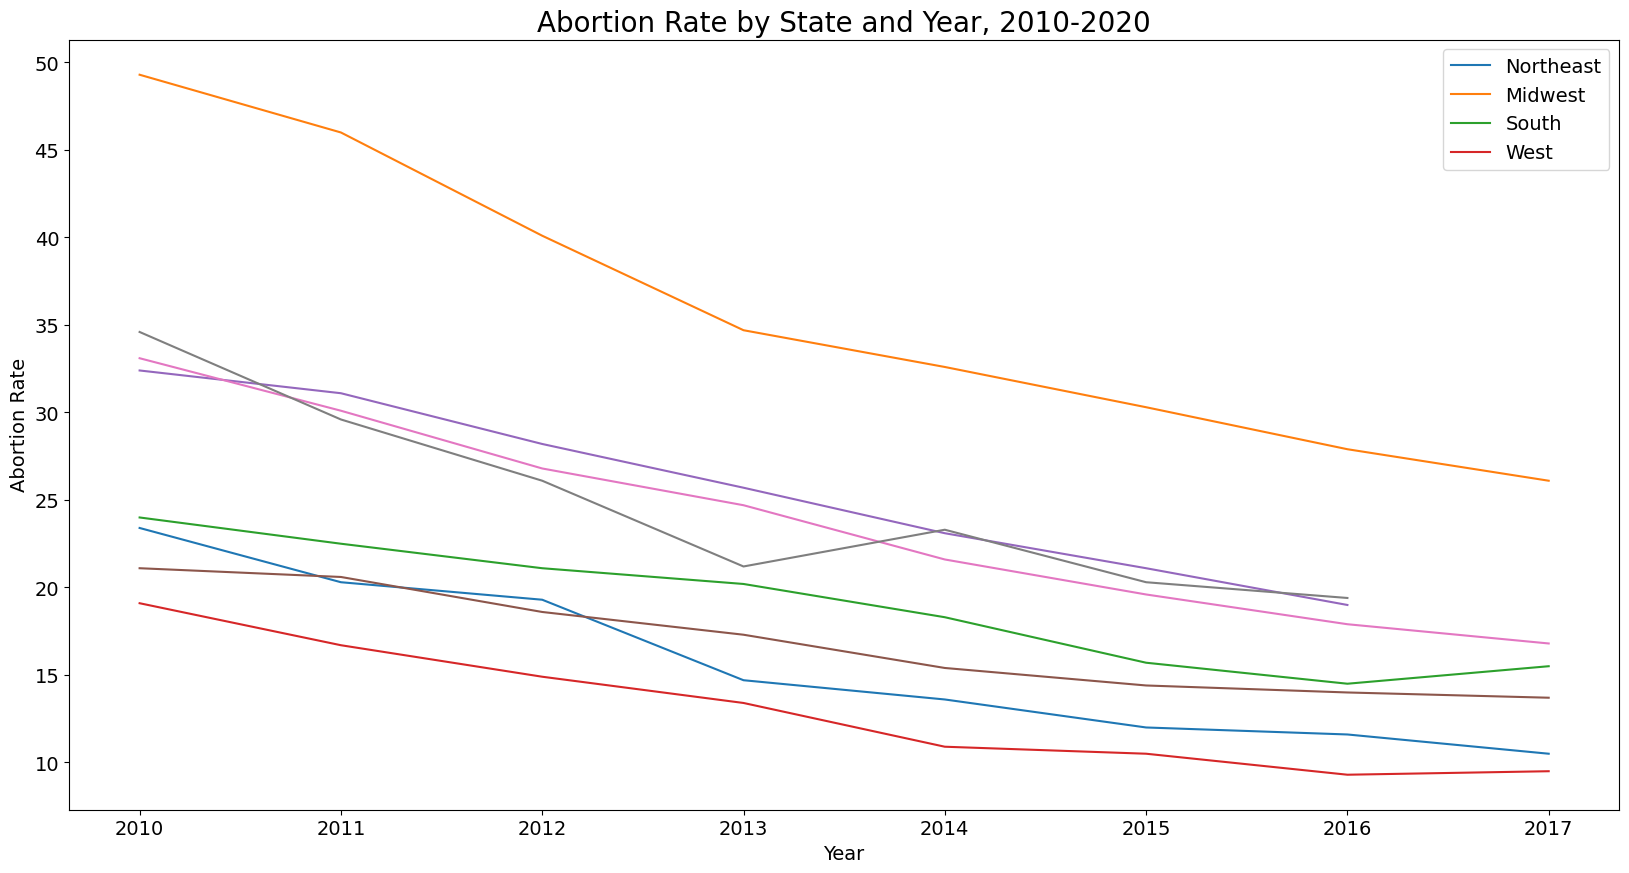

In [76]:
# Load the data into a Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/NationalAndStatePregnancy_PublicUse.csv")

# Filter the data for the age group of 18-29 years old and the years from 2010 to 2020
df_filtered = df[(df["year"] >= 2010) & (df["year"] <= 2020) & (df["pregnancyrate1819"].notnull()) & (df["abortionrate1819"].notnull())]

# Select the 2 states for each region that you want to display
states = {
    "Northeast": ["MA", "NY"],
    "Midwest": ["IL", "OH"],
    "South": ["FL", "GA"],
    "West": ["CA", "NV"]
}

# Pivot the data so that the states are columns and the years are rows
df_pivot = df_filtered.pivot(index="year", columns="state", values="abortionrate1819")

# Select the states for each region and create a time series chart for the abortion rate by state and year
fig, ax = plt.subplots(figsize=(20, 10))
for region, state_list in states.items():
    df_region = df_pivot[state_list]
    df_region.plot(ax=ax)

# Set the x-axis label
ax.set_xlabel ("Year", fontsize=14)


# Set the y-axis label
ax.set_ylabel("Abortion Rate", fontsize=14)

# Set the title of the graph
ax.set_title("Abortion Rate by State and Year, 2010-2020", fontsize=20)

ax.legend(loc="upper right", fontsize=12)

# Add a legend
ax.legend(states.keys())

# Display the graph
plt.show()
#This graph is interessting because it shows a steady decline in the abortion rate as the years go on. Each region has two states. 

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Rate')

Text(0.5, 1.0, 'Average Pregnancy Rate vs Abortion Rate for 18-29 Years Old, 2010-2020')

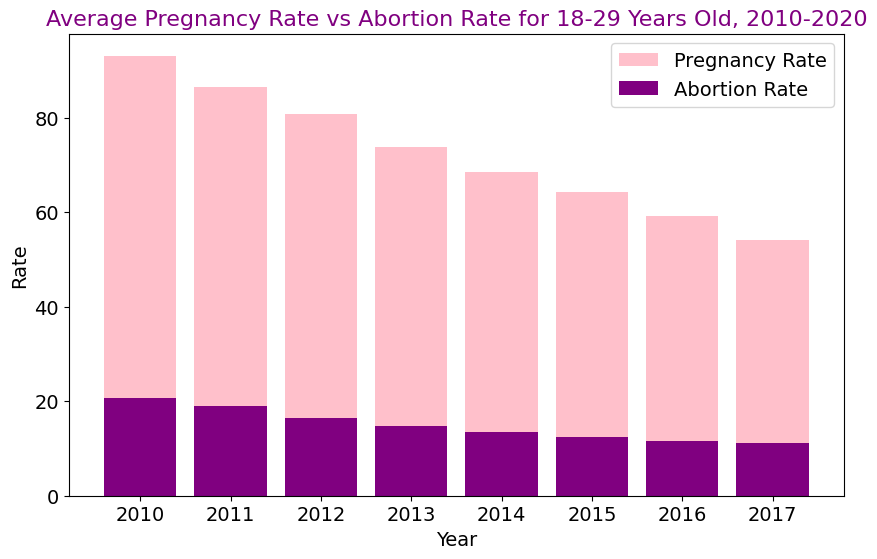

In [77]:
# Load the data into a Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/NationalAndStatePregnancy_PublicUse.csv")

# Filter the data for the age group of 18-29 years old and the years from 2010 to 2020
df_filtered = df[(df["year"] >= 2010) & (df["year"] <= 2020) & (df["pregnancyrate1819"].notnull()) & (df["abortionrate1819"].notnull())]

# Calculate the mean pregnancy rate and abortion rate for each year
df_mean = df_filtered.groupby("year")[["pregnancyrate1819", "abortionrate1819"]].mean().reset_index()

# Create a bar chart for the mean pregnancy rate and abortion rate for each year
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_mean["year"], df_mean["pregnancyrate1819"], label="Pregnancy Rate", color="pink")
ax.bar(df_mean["year"], df_mean["abortionrate1819"], label="Abortion Rate", color="purple")

# Set the x-axis label
ax.set_xlabel("Year")

# Set the y-axis label
ax.set_ylabel("Rate")

# Set the title of the graph
ax.set_title("Average Pregnancy Rate vs Abortion Rate for 18-29 Years Old, 2010-2020", fontsize=16, color="purple")

# Add a legend
ax.legend()

# Display the graph
plt.show()
#This graph is cool because it shows that compared to the pregnacy rate, abortion is relatively low. 

<BarContainer object of 56 artists>

Text(0.5, 0, 'Abortion rate (%)')

Text(0, 0.5, 'State')

Text(0.5, 1.0, 'Out of State Abortion Rate - 2020')

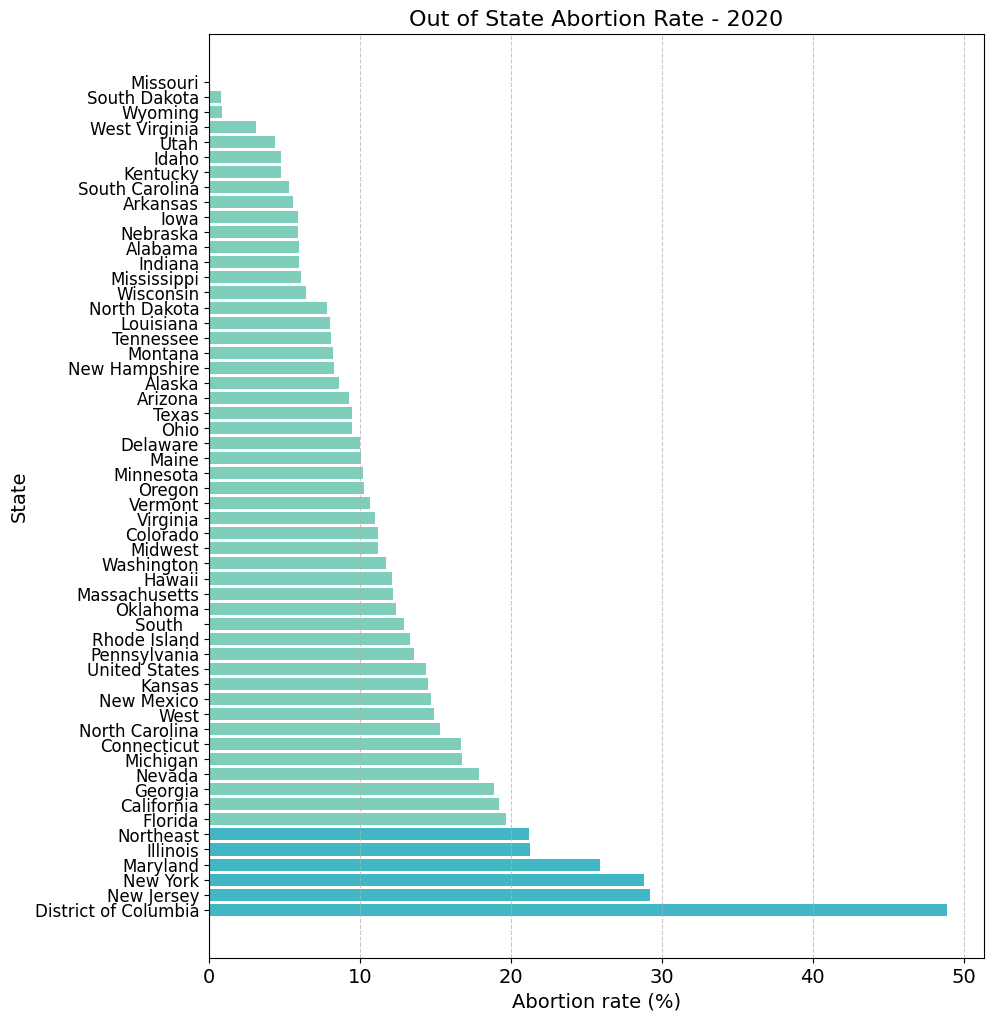

In [78]:
# create a pandas DataFrame with the relevant columns
abortionmerge = pd.DataFrame({
    'State': abortionCen['State'],
    'Abortion rate (%)': abortionCen['Abortion rate among women aged 15-44 (2020)']
})

# drop any rows with missing data
abortionmerge = abortionmerge.dropna()

# sort the data by descending order of abortion rate
abortionmerge = abortionmerge.sort_values(by='Abortion rate (%)', ascending=False)

# create a horizontal bar chart with customizations
fig, ax = plt.subplots(figsize=(10, 12))

# set color for the bars
colors = ['#7fcdbb' if x < 20 else '#41b6c4' for x in abortionmerge['Abortion rate (%)']]

# plot the bars
ax.barh(abortionmerge['State'], abortionmerge['Abortion rate (%)'], color=colors)

# add grid lines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# set x-axis label, y-axis label, and title
ax.set_xlabel('Abortion rate (%)', fontsize=14)
ax.set_ylabel('State', fontsize=14)
ax.set_title('Out of State Abortion Rate - 2020', fontsize=16)

# set font size for y-axis tick labels
ax.tick_params(axis='y', labelsize=12)

# display the chart
plt.show()

#aok: nice graph! want to be super clear about measure eg:
#is rate out of all female or only those pregneat
#is it by place of residence or place of abortion, etc

#This is for out of state abortions. 
#D.C data means that 70% of abortions conducted in the state were from out of state residents.

<Axes: xlabel='Region'>

Text(0.5, 1.0, 'Abortion Rates by Region in 2020')

Text(0.5, 0, 'Region')

Text(0, 0.5, 'Abortion Rate (%)')

Text(0, 21.7, '21.2')

Text(1, 11.7, '11.2')

Text(2, 13.4, '12.9')

Text(3, 15.4, '14.9')

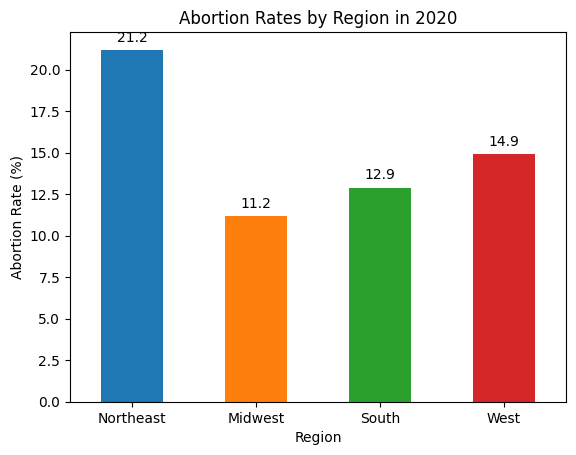

In [50]:
# data for the chart
data = {'Region': ['Northeast', 'Midwest', 'South', 'West'],
        'Abortion Rate': [21.2, 11.2, 12.9, 14.9]}

# create a pandas dataframe from the data
abortion_rates = pd.DataFrame(data)

# define colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# bar chart with custom colors
abortion_rates.plot.bar(x='Region', y='Abortion Rate', rot=0, legend=None, color=colors)

# set the chart title and axis labels
plt.title('Abortion Rates by Region in 2020')
plt.xlabel('Region')
plt.ylabel('Abortion Rate (%)')

# labels for the values on top of the bars
for i, v in enumerate(abortion_rates['Abortion Rate']):
    plt.text(i, v + 0.5, str(v), ha='center')

# display the chart
plt.show()


<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Number of States with and without Abortion Ban')

Text(0.5, 0, 'Number of States')

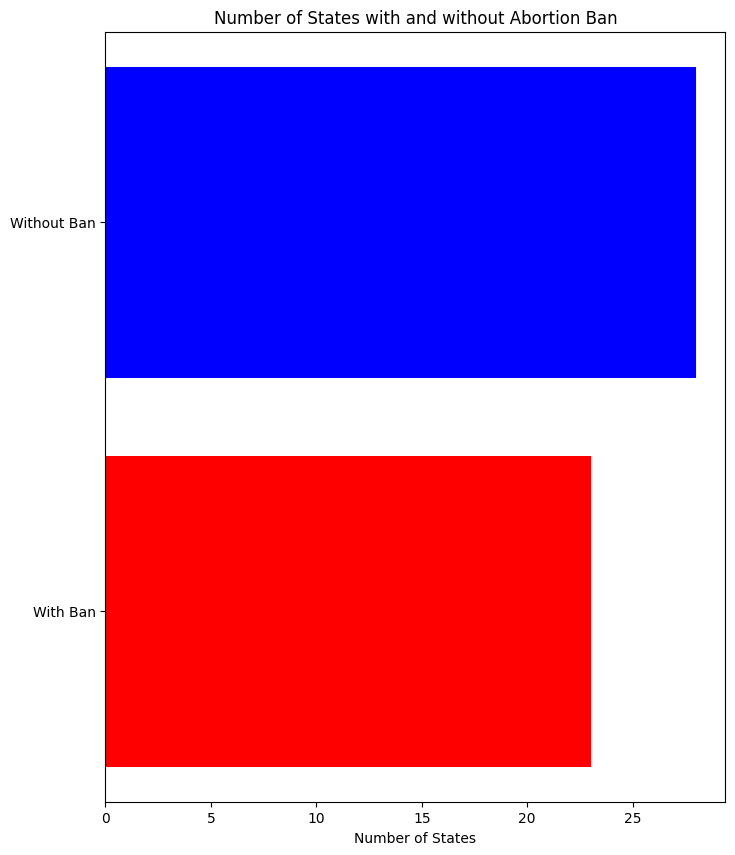

In [51]:
# Data
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
codes = [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0]

num_bans = sum(codes)
num_no_bans = len(codes) - num_bans

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 10))
ax.barh(['With Ban', 'Without Ban'], [num_bans, num_no_bans], color=['red', 'blue'])
ax.set_title('Number of States with and without Abortion Ban')
ax.set_xlabel('Number of States')
plt.show()
#This graph shows that more states do not have bans compared to states that do have bans. 


Text(0.5, 0, 'Abortion ban by state')

Text(0, 0.5, 'Percentage of abortions')

Text(0.5, 1.0, 'Percentage of abortions by state with respect to abortion ban')

[Text(0.0, 0, 'Ban exists'), Text(0.35, 0, 'No ban')]

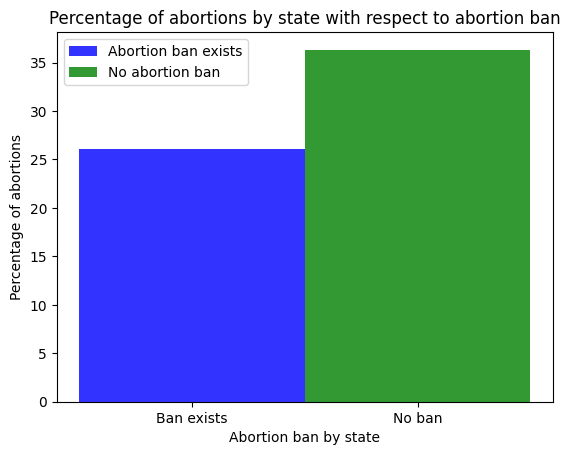

In [52]:
# Data - percentage of abortions by state
abortion_pct = [20, 24, 15, 18, 27, 22, 30, 32, 16, 19, 23, 21, 33, 26, 29, 35, 17, 25, 31, 28, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]

# Data - abortion ban by state
abortion_ban = [1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#Data - partial ban by state = []

# Calculate the mean abortion percentage for each group
banned_pct = np.mean([abortion_pct[i] for i in range(len(abortion_pct)) if abortion_ban[i] == 1])
not_banned_pct = np.mean([abortion_pct[i] for i in range(len(abortion_pct)) if abortion_ban[i] == 0])

# Create the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8
rects1 = ax.bar(0, banned_pct, bar_width,
                alpha=opacity, color='b',
                label='Abortion ban exists')
rects2 = ax.bar(bar_width, not_banned_pct, bar_width,
                alpha=opacity, color='g',
                label='No abortion ban')

# Add labels, title, and legend
ax.set_xlabel('Abortion ban by state')
ax.set_ylabel('Percentage of abortions')
ax.set_title('Percentage of abortions by state with respect to abortion ban')
ax.set_xticks([0, bar_width])
ax.set_xticklabels(['Ban exists', 'No ban'])
ax.legend()

# Display the plot
plt.show()

#This graph shows abortion bans compared to the percentage of abortions by state. 
#From this graph it looks like the states with the lowest percentages of abortion are the same states with abortion bans.
#aok: nice! ideally have more compleexity eg add partial ban; also can do legal v illegal abortions, types of clinics/hospitals etc

<Axes: ylabel='State'>

Text(0.5, 0, 'Number of Laws')

Text(0, 0.5, 'State')

Text(0.5, 1.0, 'Abortion Laws by State and Type')

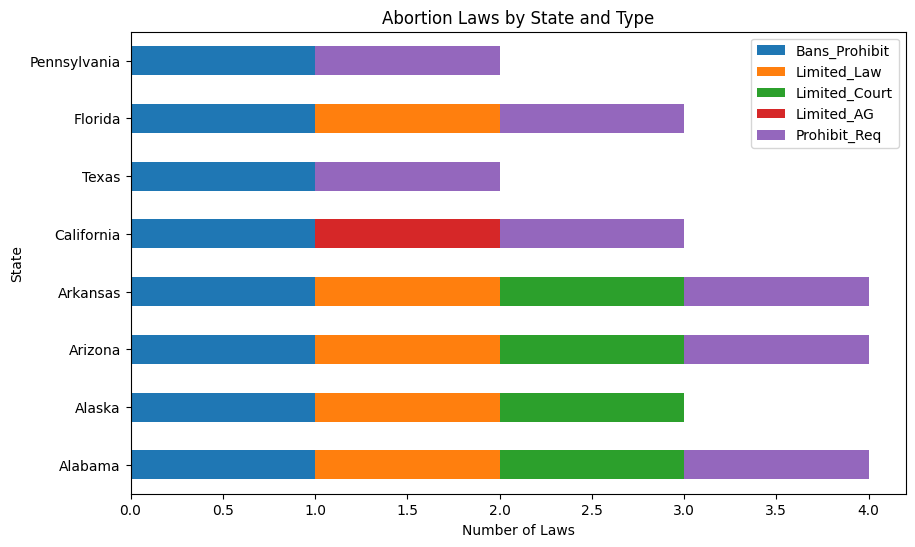

In [53]:
# create a sample dataframe with random data
data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Texas', 'Florida', 'Pennsylvania'],
    'Bans_Prohibit': [1, 1, 1, 1, 1, 1, 1, 1],
    'Limited_Law': [1, 1, 1, 1, 0, 0, 1, 0],
    'Limited_Court': [1, 1, 1, 1, 0, 0, 0, 0],
    'Limited_AG': [0, 0, 0, 0, 1, 0, 0, 0],
    'Prohibit_Req': [1, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# create a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df.set_index('State', inplace=True)
df.plot(kind='barh', stacked=True, ax=ax)

# set axis labels and title
ax.set_xlabel('Number of Laws')
ax.set_ylabel('State')
ax.set_title('Abortion Laws by State and Type')

plt.show()
#For this graph I decided to use states that were either lean toward political extremes to ulitize the data. 
#Interesting that California has Limited_AG (limited by gestation weeks) but none of the other states do.  

**Data Visulation Section (two) **

This sections contains opinions on abortion by year and demographics such as income, gender, religion, political affilliation, etc. 

<ipython-input-91-33b55bb9395e>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories, rotation=90)


[Text(-5.0, 0, 'Men'),
 Text(0.0, 0, 'Women'),
 Text(5.0, 0, '18-29'),
 Text(10.0, 0, '30-49'),
 Text(15.0, 0, '50-64'),
 Text(20.0, 0, '65 and older'),
 Text(25.0, 0, 'Non-Hispanic White'),
 Text(30.0, 0, 'People of Color')]

Text(0.5, 0, 'Demographics')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Pro-Choice vs. Pro-Life Attitudes 2022')

(0.0, 100.0)

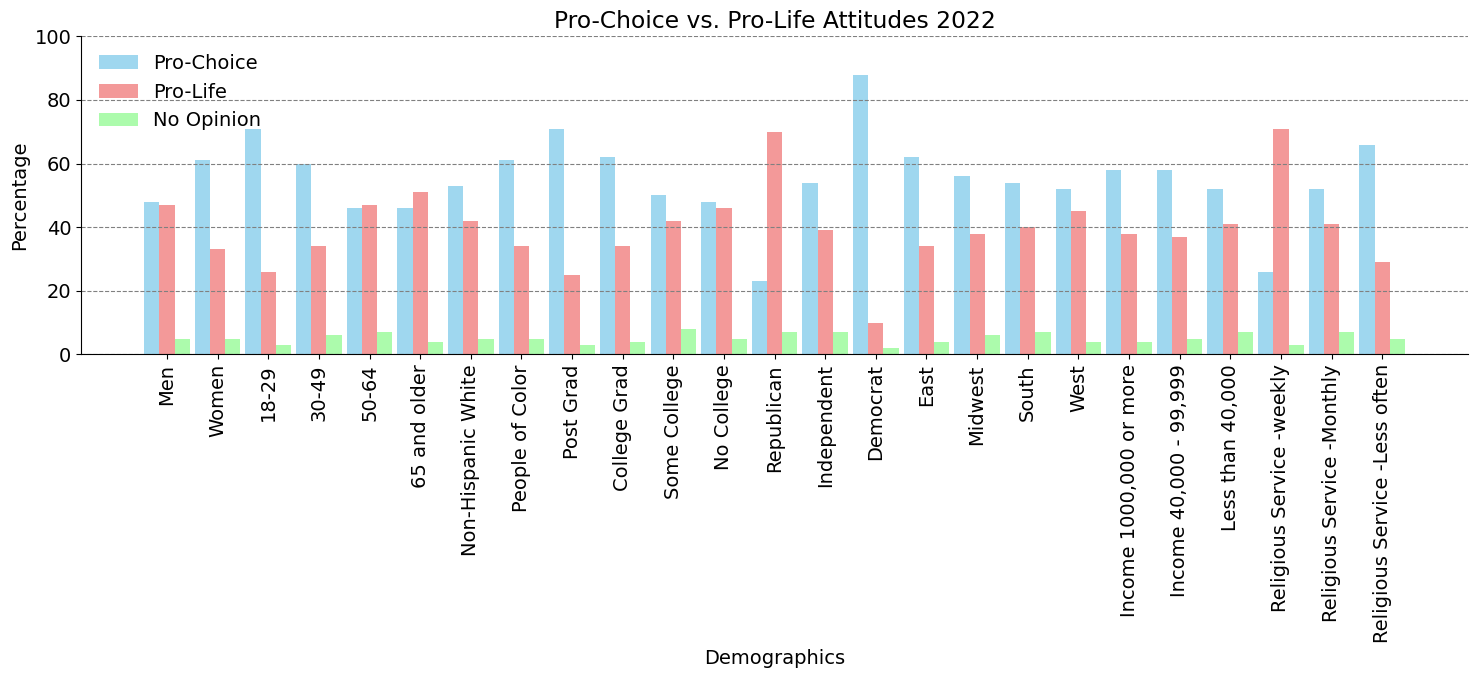

In [91]:
# Define the data
categories = ['Men', 'Women', '18-29', '30-49', '50-64', '65 and older', 
              'Non-Hispanic White', 'People of Color', 'Post Grad', 'College Grad', 
              'Some College', 'No College', 'Republican', 'Independent', 
              'Democrat', 'East', 'Midwest', 'South', 'West', 'Income 1000,000 or more',
              'Income 40,000 - 99,999', 'Less than 40,000', 'Religious Service -weekly',
              'Religious Service -Monthly', 'Religious Service -Less often']
pro_choice = [48, 61, 71, 60, 46, 46, 53, 61, 71, 62, 50, 48, 23, 54, 88, 62, 56, 54, 52, 58, 58, 52, 26, 52, 66]
pro_life = [47, 33, 26, 34, 47, 51, 42, 34, 25, 34, 42, 46, 70, 39, 10, 34, 38, 40, 45, 38, 37, 41, 71, 41, 29]
no_opinion = [5, 5, 3, 6, 7, 4, 5, 5, 3, 4, 8, 5, 7, 7, 2, 4, 6, 7, 4, 4, 5, 7, 3, 7, 5]

# Create the bar graph
fig, ax = plt.subplots(figsize=(15, 7))
bar_width = 0.3
opacity = 0.8

bar1 = ax.bar([i - bar_width for i in np.arange(len(categories))], pro_choice, bar_width, alpha=opacity, color='skyblue', label='Pro-Choice')
bar2 = ax.bar([i for i in np.arange(len(categories))], pro_life, bar_width, alpha=opacity, color='lightcoral', label='Pro-Life')
bar3 = ax.bar([i + bar_width for i in np.arange(len(categories))], no_opinion, bar_width, alpha=opacity, color='palegreen', label='No Opinion')

ax.set_xticklabels(categories, rotation=90)
ax.set_xticks([i for i in np.arange(len(categories))])
ax.set_xlabel('Demographics')
ax.set_ylabel('Percentage')
ax.set_title('Pro-Choice vs. Pro-Life Attitudes 2022')

ax.legend(loc='upper left', frameon=False)

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set y-axis range from 0 to 100
ax.set_ylim([0, 100])

# Add gridlines
ax.yaxis.grid(color='gray', linestyle='dashed')

# Increase font size
plt.rcParams.update({'font.size': 14})


plt.tight_layout()
plt.show()

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Trends in Pro-Choice and Pro-Life Attitudes')

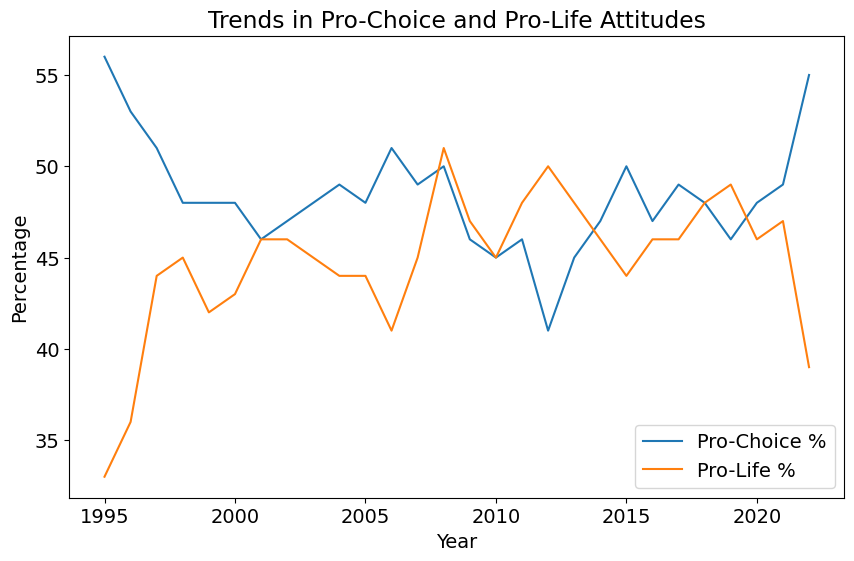

In [55]:
# Create a DataFrame from the data
data = {
    'Year': [2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995],
    'Pro-Choice %': [55, 49, 48, 46, 48, 49, 47, 50, 47, 45, 41, 46, 45, 46, 50, 49, 51, 48, 49, 48, 47, 46, 48, 48, 48, 51, 53, 56],
    'Pro-Life %': [39, 47, 46, 49, 48, 46, 46, 44, 46, 48, 50, 48, 45, 47, 51, 45, 41, 44, 44, 45, 46, 46, 43, 42, 45, 44, 36, 33]
    
}
df = pd.DataFrame(data)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data as a line chart
ax.plot(df['Year'], df['Pro-Choice %'], label='Pro-Choice %')
ax.plot(df['Year'], df['Pro-Life %'], label='Pro-Life %')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('Trends in Pro-Choice and Pro-Life Attitudes')

# Add a legend
ax.legend()

# Show the plot
plt.show()
#This is the updated graph using pandas dataframe. 
#aok: fantastic! again can add more complexity say opinions by gender, education, left-right/rep-dem etc

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Change in Abortion Views over Time')

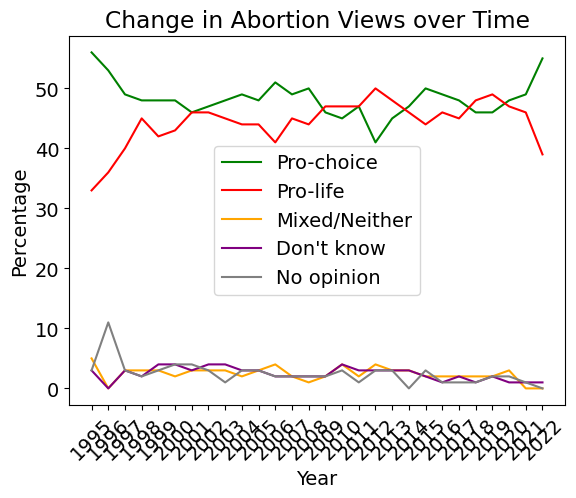

In [56]:
# Data
years = ["1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
pro_choice = [56, 53, 49, 48, 48, 48, 46, 47, 48, 49, 48, 51, 49, 50, 46, 45, 47, 41, 45, 47, 50, 49, 48, 46, 46, 48, 49, 55]
pro_life = [33, 36, 40, 45, 42, 43, 46, 46, 45, 44, 44, 41, 45, 44, 47, 47, 47, 50, 48, 46, 44, 46, 45, 48, 49, 47, 46, 39]
mixed = [5, 0, 3, 3, 3, 2, 3, 3, 3, 2, 3, 4, 2, 1, 2, 4, 2, 4, 3, 3, 2, 2, 2, 2, 2, 3, 0, 0]
dont_know = [3, 0, 3, 2, 4, 4, 3, 4, 4, 3, 3, 2, 2, 2, 2, 4, 3, 3, 3, 3, 2, 1, 2, 1, 2, 1, 1, 1]
no_opinion = [3, 11, 3, 2, 3, 4, 4, 3, 1, 3, 3, 2, 2, 2, 2, 3, 1, 3, 3, 0, 3, 1, 1, 1, 2, 2, 1, 0]

# Plot
fig, ax = plt.subplots()
ax.plot(years, pro_choice, label="Pro-choice", color="green")
ax.plot(years, pro_life, label="Pro-life", color="red")
ax.plot(years, mixed, label="Mixed/Neither", color="orange")
ax.plot(years, dont_know, label="Don't know", color="purple")
ax.plot(years, no_opinion, label="No opinion", color="gray")

# Axes labels and legend
ax.set_xlabel("Year")
ax.set_ylabel("Percentage")
ax.set_title("Change in Abortion Views over Time")

# Adjust x-axis spacing
ax.set_xticks(years)
ax.tick_params(axis='x', rotation=45)
ax.legend()
plt.show()
#This graph really struck me. When gathering the data, I did not think that opinions of abortion would change and move up and down as they did. 
#Very pro-choice in 1995 and then that drop and up again, down again. 
#ODD


<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Abortion views by Year')

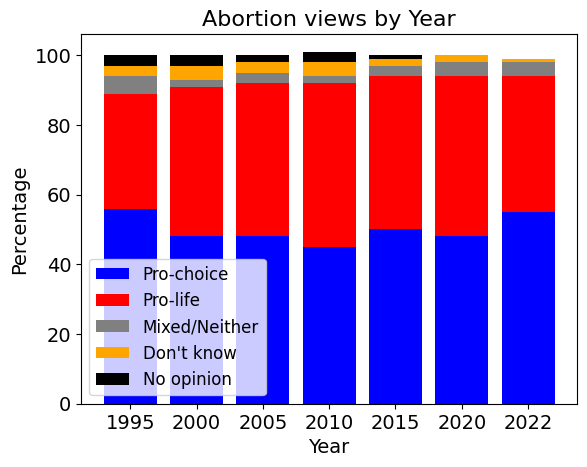

In [57]:
# Data
time_frame = ["1995", "2000", "2005", "2010", "2015", "2020", "2022"]
pro_choice = [56, 48, 48, 45, 50, 48, 55]
pro_life = [33, 43, 44, 47, 44, 46, 39]
mixed_neither = [5, 2, 3, 2, 3, 4, 4]
dont_know = [3, 4, 3, 4, 2, 2, 1]
no_opinion = [3, 3, 2, 3, 1, 0, 0]

# Plot
fig, ax = plt.subplots()
ax.bar(time_frame, pro_choice, label="Pro-choice", color="Blue")
ax.bar(time_frame, pro_life, bottom=pro_choice, label="Pro-life", color="red")
ax.bar(time_frame, mixed_neither, bottom=[i+j for i,j in zip(pro_choice, pro_life)], label="Mixed/Neither", color="gray")
ax.bar(time_frame, dont_know, bottom=[i+j+k for i,j,k in zip(pro_choice, pro_life, mixed_neither)], label="Don't know", color="Orange")
ax.bar(time_frame, no_opinion, bottom=[i+j+k+l for i,j,k,l in zip(pro_choice, pro_life, mixed_neither, dont_know)], label="No opinion", color="black")

# Axes labels and legend
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Percentage", fontsize=14)
ax.set_title("Abortion views by Year", fontsize=16)
ax.legend(fontsize=12)

plt.show()

#This graph is also cool because it shows that people are becoming more polizaried in their views as time goes on. 
#No opinion dissapears! 
#Again, this graph shows suppport for and aganist abortion changes over time. 
